## OPEN ENDED LAB 22F-BSAI-96

In [63]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [64]:
# Load the dataset
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [66]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [67]:
# Replace 0 values with NaN then used mean
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

In [68]:
# Impute missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

In [69]:
# Normalize the numeric features
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [70]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


## Visualize the data

Generate plots to visualize key features and their relationship with the outcome.

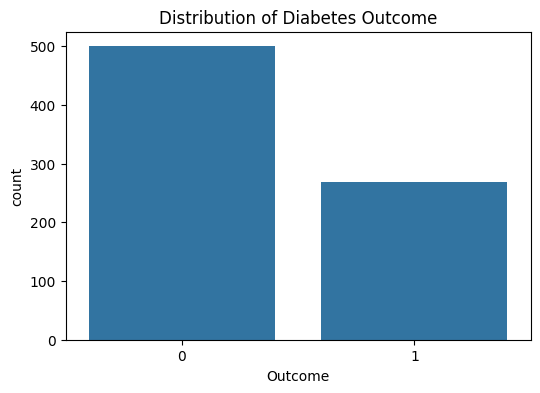

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the Outcome variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.show()

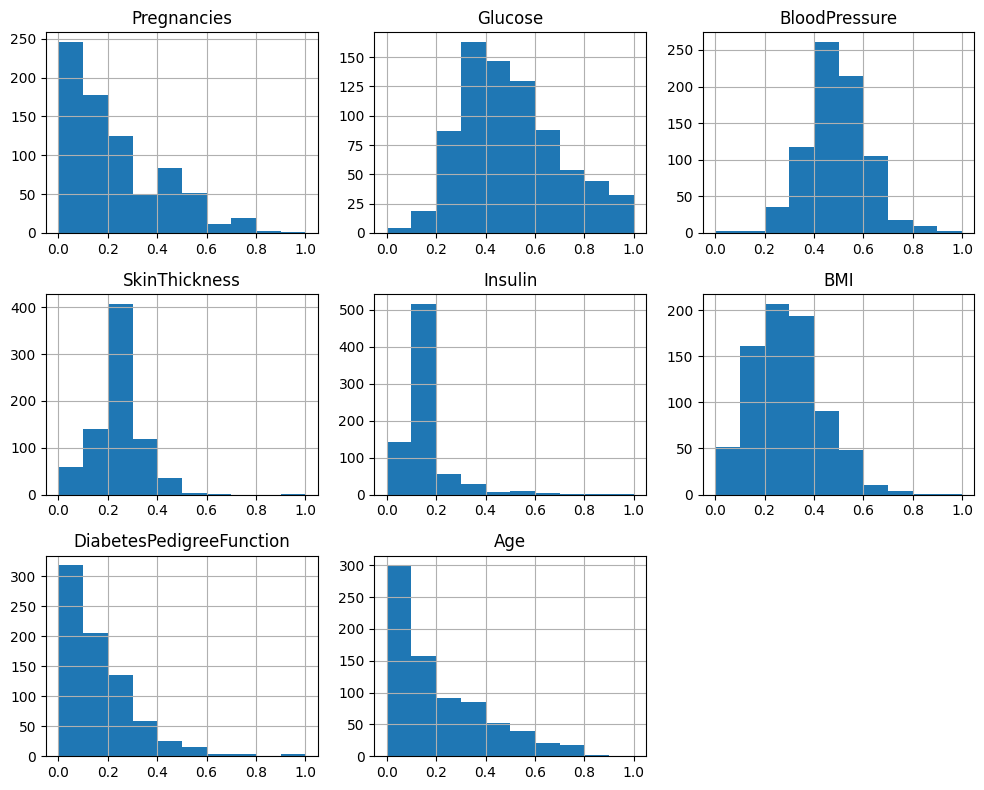

In [72]:
# Histograms of numeric features
df[numeric_cols].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

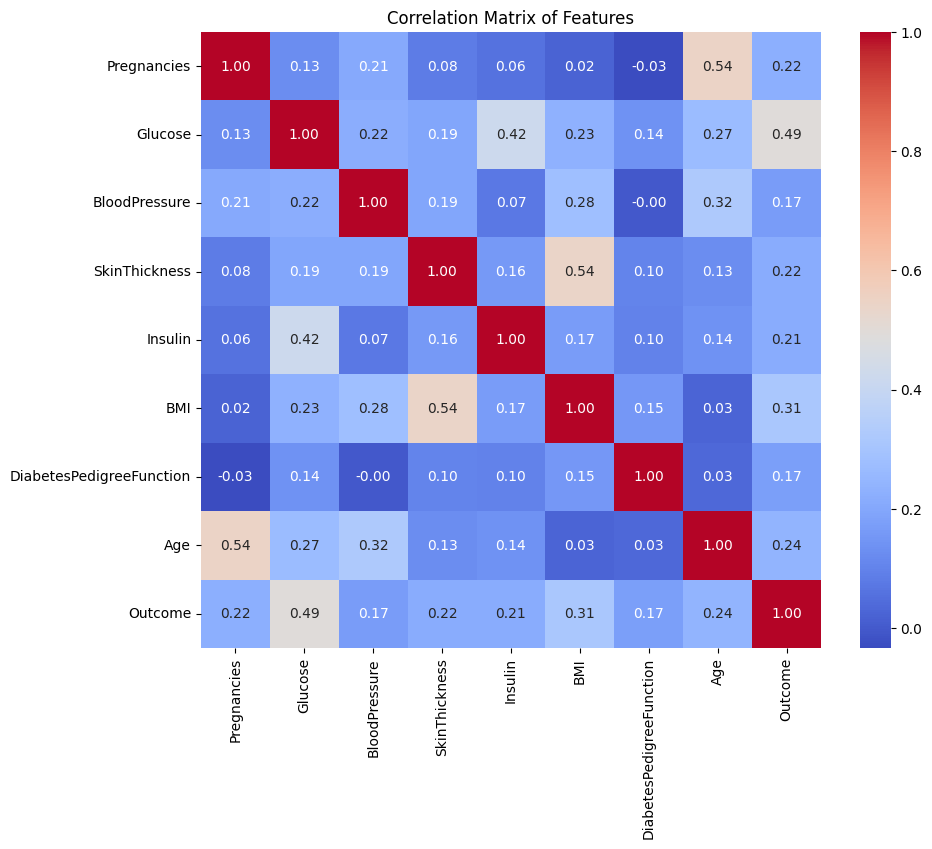

In [73]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [74]:
# Splitting the training and testing data
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


## Applying SVM Model

In [75]:
# Applying the SVM Model on the data
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)


SVC(random_state=42)

## DecisionTreeClassifier

In [76]:
# Applying the DT Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [77]:
# Making Predictions on the test for SVM
y_pred_svm = svm_model.predict(X_test)

In [78]:
# Making Predictions on the test for DT
y_pred_dt = dt_model.predict(X_test)

## Evaluation metrics for both SVM and Decision Tree models on the test set.



In [79]:
# SVM On the test data
print("SVM Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1-score:", f1_score(y_test, y_pred_svm))

SVM Metrics:
Accuracy: 0.7597402597402597
Precision: 0.6956521739130435
Recall: 0.5818181818181818
F1-score: 0.6336633663366337


In [80]:
# Decision Tree On the test data
print("\nDecision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))


Decision Tree Metrics:
Accuracy: 0.7207792207792207
Precision: 0.6071428571428571
Recall: 0.6181818181818182
F1-score: 0.6126126126126126


In [81]:
# Training and Testing accuracy for the
print("Training Accuracy:", svm_model.score(X_train, y_train))
print("Test Accuracy:", svm_model.score(X_test, y_test))

Training Accuracy: 0.7947882736156352
Test Accuracy: 0.7597402597402597


In [82]:
print("Training Accuracy:", dt_model.score(X_train, y_train))
print("Test Accuracy:", dt_model.score(X_test, y_test))

Training Accuracy: 1.0
Test Accuracy: 0.7207792207792207


## Summary:

### Data Analysis Key Findings

* The dataset initially contained 0 values in 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI' columns, which were treated as missing and imputed with the mean.
* Numeric features were normalized using MinMaxScaler.
* The data was split into training (614 samples) and testing (154 samples) sets, with an 80/20 ratio.
* On the test set, the SVM model achieved an accuracy of 0.7597, precision of 0.6957, recall of 0.5818, and F1-score of 0.6337.
* On the test set, the Decision Tree model achieved an accuracy of 0.7208, precision of 0.6071, recall of 0.6182, and F1-score of 0.6126.
* The SVM model showed slightly better overall accuracy, precision, and F1-score on the test set compared to the Decision Tree.
* The Decision Tree model had a higher recall, indicating it was better at identifying actual positive cases (diabetes), but with lower precision (more false positives).

### Insights or Next Steps

* While the test set metrics suggest the SVM generalizes slightly better, comparing training and testing metrics is necessary for a definitive conclusion on overfitting for both models.
* Given the higher recall of the Decision Tree, further tuning or regularization techniques could be applied to reduce potential overfitting while maintaining its ability to identify positive cases, which is crucial in medical diagnosis.

## Summary:

### Data Analysis Key Findings

*   The dataset initially contained 0 values in 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI' columns, which were treated as missing and imputed with the mean.
*   Numeric features were normalized using MinMaxScaler.
*   The data was split into training (614 samples) and testing (154 samples) sets, with an 80/20 ratio.
*   On the test set, the SVM model achieved an accuracy of 0.7597, precision of 0.6957, recall of 0.5818, and F1-score of 0.6337.
*   On the test set, the Decision Tree model achieved an accuracy of 0.7208, precision of 0.6071, recall of 0.6182, and F1-score of 0.6126.
*   The SVM model showed slightly better overall accuracy, precision, and F1-score on the test set compared to the Decision Tree.
*   The Decision Tree model had a higher recall, indicating it was better at identifying actual positive cases (diabetes), but with lower precision (more false positives).

### Insights or Next Steps

*   While the test set metrics suggest the SVM generalizes slightly better, comparing training and testing metrics is necessary for a definitive conclusion on overfitting for both models.
*   Given the higher recall of the Decision Tree, further tuning or regularization techniques could be applied to reduce potential overfitting while maintaining its ability to identify positive cases, which is crucial in medical diagnosis.
